<a href="https://colab.research.google.com/github/AnnaBozhenko/ML_course/blob/master/01_pyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

# import numpy as np
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

'2.2.1+cu121'

Create a basic linear regression model

In [ ]:
weight = 0.45
bias = 0.3

lower_limit = 0.1
upper_limit = 0.9

X = torch.arange(lower_limit, upper_limit, step=0.02).unsqueeze(dim=1)



In [ ]:
y = weight * X + bias

In [ ]:
y.requires_grad = False

In [ ]:
train_n_split = int(0.8*len(X))
train_X, test_X = X[:train_n_split], X[train_n_split:]
train_y, test_y = y[:train_n_split], y[train_n_split:]

Linear regression implemented as a class

In [ ]:
# slass Linear regression implementation
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # -> torch.Tensor
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x  + self.bias


In [ ]:
def plot_model(training_X_data: torch.Tensor,
               training_y_data: torch.Tensor,
               testing_X_data: torch.Tensor,
               testing_y_data: torch.Tensor,
               prediction=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(training_X_data, training_y_data, label="Training data", c="b", s=4)
  plt.scatter(testing_X_data, testing_y_data, label="Testing data", c="g", s=4)

  if prediction is not None:
    plt.scatter(testing_X_data, prediction, label="Prediction", c="r", s=4)

  plt.legend()
  plt.plot()



In [ ]:
linear_m = LinearRegression()
y = linear_m.forward(X)
y = y.detach()

In [ ]:
train_n_split = int(0.8*len(X))
train_X, test_X = X[:train_n_split], X[train_n_split:]
train_y, test_y = y[:train_n_split], y[train_n_split:]

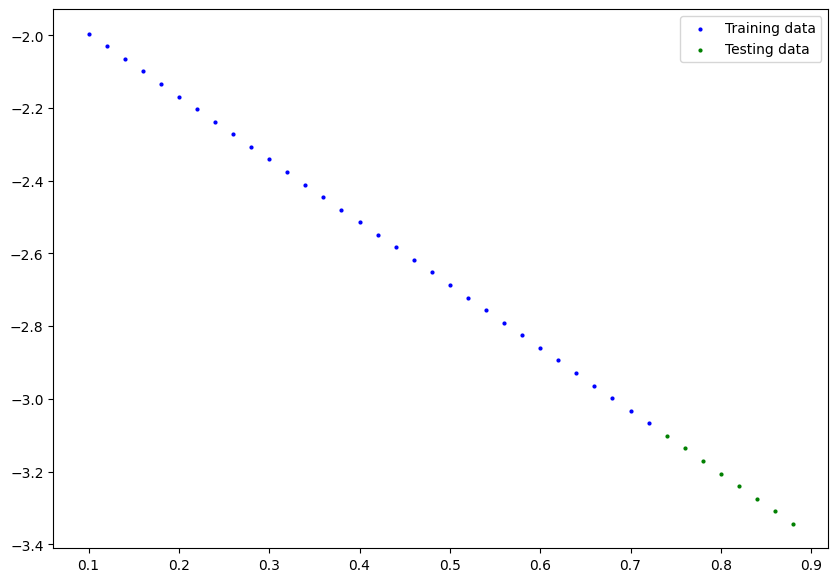

In [ ]:
plot_model(train_X,
           train_y,
           test_X,
           test_y)

Making predictions



In [ ]:
model_0 = LinearRegression()

model_0.state_dict()

OrderedDict([('weights', tensor([0.0978])), ('bias', tensor([-0.5447]))])

In [ ]:
test_X, test_y


(tensor([[0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]),
 tensor([[-3.1016],
         [-3.1362],
         [-3.1707],
         [-3.2053],
         [-3.2398],
         [-3.2744],
         [-3.3090],
         [-3.3435]]))

In [ ]:
model_0.train()

with torch.inference_mode():
  predictions = model_0(test_X)

In [ ]:
predictions

tensor([[-0.4723],
        [-0.4703],
        [-0.4684],
        [-0.4664],
        [-0.4645],
        [-0.4625],
        [-0.4606],
        [-0.4586]])

In [ ]:
test_X * model_0.weights + model_0.bias

tensor([[-0.4723],
        [-0.4703],
        [-0.4684],
        [-0.4664],
        [-0.4645],
        [-0.4625],
        [-0.4606],
        [-0.4586]], grad_fn=<AddBackward0>)

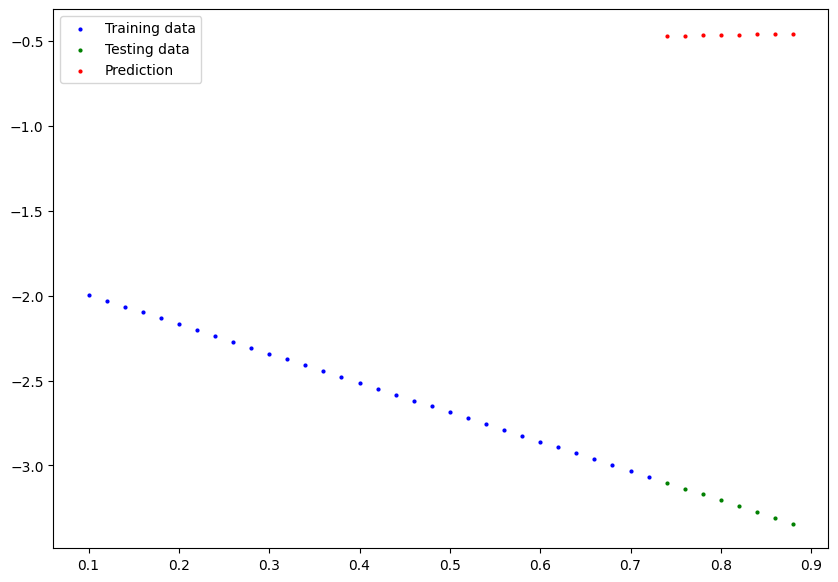

In [ ]:
plot_model(train_X,
           train_y,
           test_X,
           test_y,
           predictions)

In [ ]:
X = torch.arange(lower_limit, upper_limit, step=0.02).unsqueeze(dim=1)

train_n_split = int(0.8*len(X))
train_X, test_X = X[:train_n_split], X[train_n_split:]
train_y, test_y = y[:train_n_split], y[train_n_split:]

In [ ]:
model_0 = LinearRegression()

In [ ]:
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [ ]:
epochs_step = 100
start_n = 0
testing_step = 10
end_n = epochs_step
epochs = []
training_losses = []
testing_losses = []
parameters = []

In [ ]:
# training and testing
for epoch in range(start_n, end_n):
  model_0.train()

  prediction = model_0(train_X)

  training_loss = loss_fn(prediction, train_y)
  training_losses.append(training_loss)
  epochs.append(epoch)

  print(f"loss: {training_loss}")
  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  # testing
  model_0.eval()

  if epoch % testing_step == 0:
    with torch.inference_mode():
      test_prediction = model_0(test_X)
      test_loss = loss_fn(test_prediction, test_y)
      print(f"test loss: {test_loss}")
      print(f"parameters: {model_0.state_dict()}")

      testing_losses.append(test_loss)
      parameters.append(model_0.state_dict)

start_n = end_n
end_n += epochs_step

loss: 7.541781902313232
test loss: 8.304628372192383
parameters: OrderedDict([('weights', tensor([-1.2243])), ('bias', tensor([0.6508]))])
loss: 7.192359924316406
loss: 6.859142780303955
loss: 6.541377067565918
loss: 6.238348007202148
loss: 5.949371337890625
loss: 5.673795223236084
loss: 5.410998821258545
loss: 5.160389423370361
loss: 4.921401023864746
loss: 4.69349479675293
test loss: 5.000204086303711
parameters: OrderedDict([('weights', tensor([-1.4251])), ('bias', tensor([0.1678]))])
loss: 4.476158618927002
loss: 4.268899917602539
loss: 4.071252822875977
loss: 3.8827714920043945
loss: 3.7030301094055176
loss: 3.5316238403320312
loss: 3.368166208267212
loss: 3.2122888565063477
loss: 3.0636394023895264
loss: 2.9218835830688477
test loss: 2.982971668243408
parameters: OrderedDict([('weights', tensor([-1.5829])), ('bias', tensor([-0.2133]))])
loss: 2.786700963973999
loss: 2.657787322998047
loss: 2.534851551055908
loss: 2.417616605758667
loss: 2.3058178424835205
loss: 2.1992034912109375

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([-2.0696])), ('bias', tensor([-1.4226]))])

In [ ]:
weight, bias

(0.45, 0.3)

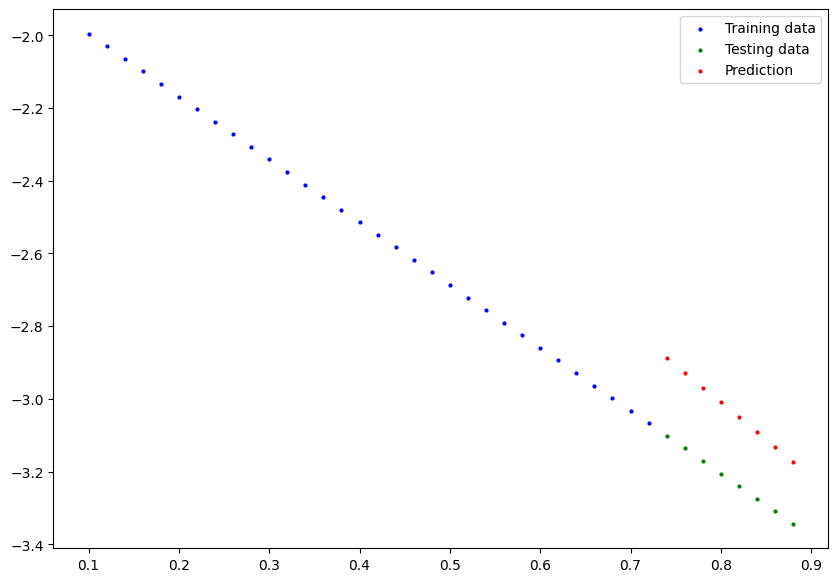

In [ ]:
plot_model(train_X,
           train_y,
           test_X,
           test_y,
           test_prediction)

In [ ]:
len(epochs), len(training_losses), len(testing_losses)

(100, 100, 10)

[]

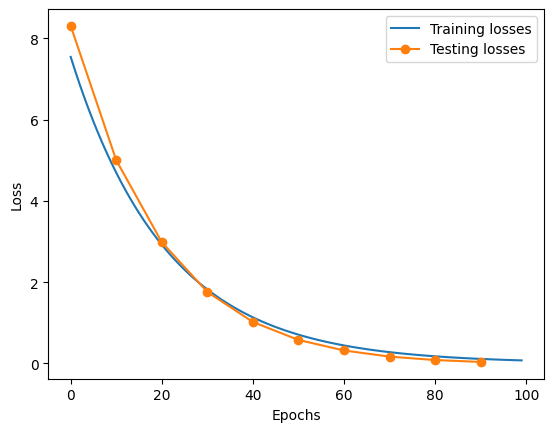

In [ ]:
with torch.inference_mode():
  plt.plot(epochs, training_losses, label="Training losses")
  plt.plot(epochs[::10], testing_losses, marker="o", label="Testing losses")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.plot()

# Saving model

In [ ]:
from pathlib import Path

In [ ]:
# create module directory
MODULE_PATH_NAME = "Models"
module_path = Path(MODULE_PATH_NAME)
module_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# create model save-path
FILE_NAME = "01_pyTorch_workflow_model_0.pth"
model_save_path = module_path / FILE_NAME

In [ ]:
# save model to the directory
print(f"saved to {model_save_path}")
torch.save(obj=model_0.state_dict(),
           f=model_save_path)


saved to Models/01_pyTorch_workflow_model_0.pth


In [ ]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1680 May 16 20:25 01_pyTorch_workflow_model_0.pth


#Load a model

In [ ]:
model_path = "Models/01_pyTorch_workflow_model_0.pth"

loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(model_path))
loaded_model_0.state_dict()



OrderedDict([('weights', tensor([-2.0696])), ('bias', tensor([-1.4226]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([-2.0696])), ('bias', tensor([-1.4226]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(test_X)

In [ ]:
loaded_model_0_preds

tensor([[-2.9541],
        [-2.9955],
        [-3.0369],
        [-3.0783],
        [-3.1197],
        [-3.1610],
        [-3.2024],
        [-3.2438]])

In [ ]:
# model_0 predictions
test_prediction

tensor([[-2.8869],
        [-2.9279],
        [-2.9689],
        [-3.0099],
        [-3.0509],
        [-3.0919],
        [-3.1329],
        [-3.1739]])

model_0 needs rerunning test on its parameters to get equal the tensors of its predictions and loaded model predictions

In [ ]:
loaded_model_0_preds == test_prediction

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  model_0_preds = model_0(test_X)

In [ ]:
loaded_model_0_preds == model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# A slightly different implementation of a LinearRegression class

In [ ]:
class LinearRegression_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



In [ ]:
# truthful parameters
weights = 0.34
bias = 0.7

In [ ]:
torch.manual_seed(42)
feature_left_boundary = 0.1
feature_right_boundary = 0.95
X = torch.arange(feature_left_boundary, feature_right_boundary, step=0.02).unsqueeze(dim=1)
X

tensor([[0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400]])

In [ ]:
y = X * weight + bias

In [ ]:
train_data_share = 0.8
train_data_n = int(len(X) * 0.8)
train_data_n

34

In [ ]:
train_X, train_y = X[:train_data_n], y[:train_data_n]
test_X, test_y = X[train_data_n:], y[train_data_n:]

In [ ]:
model_1 = LinearRegression_V2()

model_1, model_1.state_dict()

(LinearRegression_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegression_V2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_nn = nn.L1Loss()

optimizer_fn = torch.optim.SGD(params=model_1.parameters(),
                               lr=0.01)

In [ ]:
epochs_container = []
training_loss_container = []
testing_loss_container = []
testing_step = 10

In [ ]:
len(train_X)

34

In [ ]:
torch.manual_seed(42)

epochs_n = 300

for epoch in range(epochs_n):
  epochs_container.append(epoch)

  model_1.train()
  train_preds = model_1(train_X)

  train_loss = loss_nn(train_preds, train_y)
  print(f"epoch {epoch}, training loss: {train_loss}")
  training_loss_container.append(train_loss)

  optimizer_fn.zero_grad()

  train_loss.backward()

  optimizer_fn.step()

  if epoch % testing_step == 0:
    model_1.eval()

    with torch.inference_mode():
      test_preds = model_1(test_X)

      test_loss = loss_nn(test_preds, test_y)
      print(f"epoch {epoch}, testing loss: {test_loss}")
      testing_loss_container.append(test_loss)



epoch 0, training loss: 0.2652595043182373
epoch 0, testing loss: 0.38681304454803467
epoch 1, training loss: 0.2534104883670807
epoch 2, training loss: 0.24156153202056885
epoch 3, training loss: 0.22971254587173462
epoch 4, training loss: 0.217863529920578
epoch 5, training loss: 0.20601454377174377
epoch 6, training loss: 0.19416555762290955
epoch 7, training loss: 0.1823165863752365
epoch 8, training loss: 0.1704675704240799
epoch 9, training loss: 0.15861856937408447
epoch 10, training loss: 0.14676959812641144
epoch 10, testing loss: 0.24983318150043488
epoch 11, training loss: 0.13492059707641602
epoch 12, training loss: 0.12307161092758179
epoch 13, training loss: 0.11122261732816696
epoch 14, training loss: 0.09937363862991333
epoch 15, training loss: 0.0875246450304985
epoch 16, training loss: 0.07602397352457047
epoch 17, training loss: 0.06680268794298172
epoch 18, training loss: 0.05957726761698723
epoch 19, training loss: 0.05360594391822815
epoch 20, training loss: 0.049

In [ ]:
weights, bias

(0.34, 0.7)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4597]])),
             ('linear_layer.bias', tensor([0.6918]))])

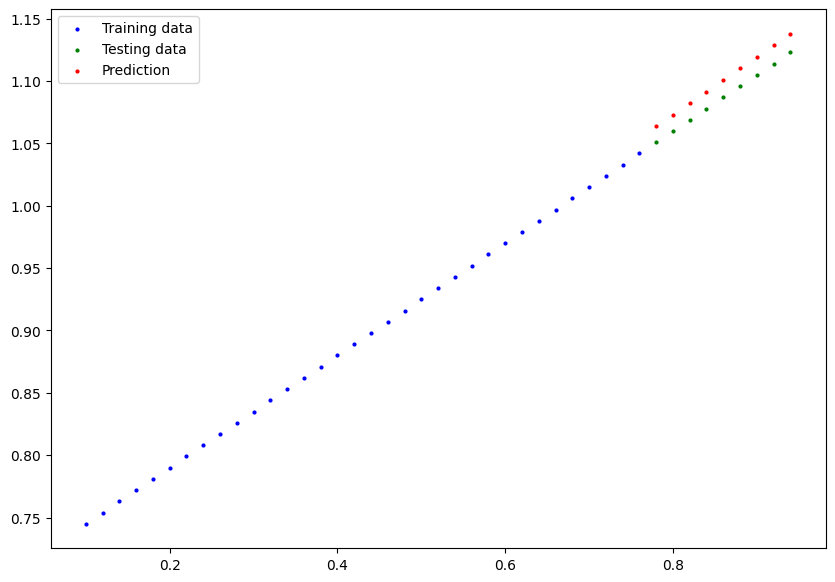

In [ ]:
plot_model(train_X,
           train_y,
           test_X,
           test_y,
           test_preds)

In [ ]:
from pathlib import Path

MODELS_DIR_PATH = Path("Models")
MODELS_DIR_PATH.mkdir(parents=True, exist_ok=True)

FILE_NAME = "01_pyTorch_workflow_model_1.pth"
MODEL_PATH = MODELS_DIR_PATH / FILE_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_PATH)


In [ ]:
!ls -l Models

total 8
-rw-r--r-- 1 root root 1680 May 16 20:25 01_pyTorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1744 May 16 20:25 01_pyTorch_workflow_model_1.pth


In [ ]:
# Load model_1

loaded_model_v2 = LinearRegression_V2()
loaded_model_v2.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_v2.eval()
with torch.inference_mode():
  loaded_model_test_preds = loaded_model_v2(test_X)


In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1_test_preds = model_1(test_X)


In [ ]:
loaded_model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4597]])),
             ('linear_layer.bias', tensor([0.6918]))])

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4597]])),
             ('linear_layer.bias', tensor([0.6918]))])

In [ ]:
loaded_model_test_preds == model_1_test_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])